In [17]:
import numpy as np
import os

def load_dataset():
    news_text = []
    news_label = []

    data_path = 'D:/nepali_news/'
    dirs = [f.path for f in os.scandir(data_path) if f.is_dir()]
    for dir in dirs:
        dir_name = dir.split('/')[-1]
        files = [f.path for f in os.scandir(dir) if not f.is_dir()]
        for file in files:
            with open(file, 'r', encoding='utf-8') as fp:
                content = fp.read().replace('\t', '').replace('\n', '')
                news_text.append(content)
                news_label.append(dir_name)
    # randomly shuffle  the data
    def randomly_shuffle(x, y):
      indices = np.arange(len(x))
      np.random.shuffle(indices)
      x = x[indices]
      y = y[indices]
      return x, y
    return randomly_shuffle(np.array(news_text), np.array(news_label))

In [20]:
import json
def load_dataset():
    x = []
    y = []
    with open('output.json', 'r') as file:
        data = json.load(file)
    for tpl in data:
        x.append(tpl[0])
        y.append(tpl[1])
    return x, y

In [21]:
x, y = load_dataset()

In [22]:
x[1001], y[1001]

('परम्परागत शैली का घर ढलान का भन्दा सुरक्षित"पुराना वास्तुकला शैली का घर हरू ढलान का भन्दा बढी सुरक्षित रहे को एक अध्ययन ले देखाए को छ भूकम्प पछि अन्तर्राष्ट्रिय संस्था इकोमस र काठमाडौं उपत्यका संरक्षण कोष को संयुक्त संयोजन मा रिच आर्किटेक्टयर्स संस्था को पहल मा ललितपुर भक्तपुर र काठमाडौं का केही नेवारी बस्ती मा गरिए को अध्ययन ले यस्तो देखाए को हो ""पुराना वास्तुकला शैली का घर हरू ढलान का भन्दा बढी सुरक्षित रहे को एक अध्ययन ले देखाए को छ भूकम्प पछि अन्तर्राष्ट्रिय संस्था इकोमस र काठमाडौं उपत्यका संरक्षण कोष को संयुक्त संयोजन मा रिच आर्किटेक्टयर्स संस्था को पहल मा ललितपुर भक्तपुर र काठमाडौं का केही नेवारी बस्ती मा गरिए को अध्ययन ले यस्तो देखाए को हो उनी हरूले ट्रेडिसनल बिल्डिङ इन्भेन्टर नामक समूह बनाई कलेज का विद्यार्थी तथा स्थानीयवासी को सहयोग मा ललितपुर को ले ले चापागाउँ ठेचो सुनाकोठी बुङमती खोकना लुभु हरिसिद्धि सानोगाउँ बाडेगाउँ ठैव भक्तपुर को थिमी बोडे नगदेश र काठमाडौं का केही भित्री नेवारी बस्ती को अध्ययन गरे का थिए त्यसक्रम मा घर मठ मन्दिर पाटीपौवा का किसिम बनावट काठ को संरचना पक

In [23]:
x[1001], y[1001]

('परम्परागत शैली का घर ढलान का भन्दा सुरक्षित"पुराना वास्तुकला शैली का घर हरू ढलान का भन्दा बढी सुरक्षित रहे को एक अध्ययन ले देखाए को छ भूकम्प पछि अन्तर्राष्ट्रिय संस्था इकोमस र काठमाडौं उपत्यका संरक्षण कोष को संयुक्त संयोजन मा रिच आर्किटेक्टयर्स संस्था को पहल मा ललितपुर भक्तपुर र काठमाडौं का केही नेवारी बस्ती मा गरिए को अध्ययन ले यस्तो देखाए को हो ""पुराना वास्तुकला शैली का घर हरू ढलान का भन्दा बढी सुरक्षित रहे को एक अध्ययन ले देखाए को छ भूकम्प पछि अन्तर्राष्ट्रिय संस्था इकोमस र काठमाडौं उपत्यका संरक्षण कोष को संयुक्त संयोजन मा रिच आर्किटेक्टयर्स संस्था को पहल मा ललितपुर भक्तपुर र काठमाडौं का केही नेवारी बस्ती मा गरिए को अध्ययन ले यस्तो देखाए को हो उनी हरूले ट्रेडिसनल बिल्डिङ इन्भेन्टर नामक समूह बनाई कलेज का विद्यार्थी तथा स्थानीयवासी को सहयोग मा ललितपुर को ले ले चापागाउँ ठेचो सुनाकोठी बुङमती खोकना लुभु हरिसिद्धि सानोगाउँ बाडेगाउँ ठैव भक्तपुर को थिमी बोडे नगदेश र काठमाडौं का केही भित्री नेवारी बस्ती को अध्ययन गरे का थिए त्यसक्रम मा घर मठ मन्दिर पाटीपौवा का किसिम बनावट काठ को संरचना पक

In [25]:
import re
from nltk.corpus import stopwords

stop_words = stopwords.words("nepali")

def text_processing(News):
    result = []
    for news in News:
        news = re.sub('<.*>', '', news) # remove tags
        news = re.sub('[।(),<<?!,—,–,/,’,‘,:,\u200d]', '', news) # remove punctuation
        news = re.sub(r'[^\u0900-\u097F\s]', '', news)  #remove non useful character
        news = re.sub(r'\d+', '', news)         # remove number 
        news = " ".join([i for i in news.split()if i not in (stop_words)])
        result.append(news)
    return result

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Falcon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
x = text_processing(x)

In [28]:
x[1001], y[1001]

('परम्परागत शैली घर ढलान सुरक्षितपुराना वास्तुकला शैली घर हरू ढलान बढी सुरक्षित रहे अध्ययन देखाए भूकम्प अन्तर्राष्ट्रिय संस्था इकोमस काठमाडौं उपत्यका संरक्षण कोष संयुक्त संयोजन रिच आर्किटेक्टयर्स संस्था पहल ललितपुर भक्तपुर काठमाडौं नेवारी बस्ती गरिए अध्ययन देखाए पुराना वास्तुकला शैली घर हरू ढलान बढी सुरक्षित रहे अध्ययन देखाए भूकम्प अन्तर्राष्ट्रिय संस्था इकोमस काठमाडौं उपत्यका संरक्षण कोष संयुक्त संयोजन रिच आर्किटेक्टयर्स संस्था पहल ललितपुर भक्तपुर काठमाडौं नेवारी बस्ती गरिए अध्ययन देखाए उनी हरूले ट्रेडिसनल बिल्डिङ इन्भेन्टर नामक समूह बनाई कलेज विद्यार्थी स्थानीयवासी सहयोग ललितपुर चापागाउँ ठेचो सुनाकोठी बुङमती खोकना लुभु हरिसिद्धि सानोगाउँ बाडेगाउँ ठैव भक्तपुर थिमी बोडे नगदेश काठमाडौं नेवारी बस्ती अध्ययन गरे त्यसक्रम घर मठ मन्दिर पाटीपौवा किसिम बनावट काठ संरचना पक्की गारो छाना फिनिसिङ रङपोताई सम्भार लगायत समग्र घर तस्बिर सहित तथ्यांक संकलन गरिए रिच आर्किटेक्ट संस्था निर्देशक पद्मसुन्दर महर्जन घर भाग ढोका झ्याल फ्रेम जोर्नी चुकल दलिन थाम प्रयोग बाहिरी भित्ता सतह प्रयोग गरिए चुन सुर्खी भ

In [29]:
print(*stop_words)
print(len(stop_words))

छ र पनि छन् लागि भएको गरेको भने गर्न गर्ने हो तथा यो रहेको उनले थियो हुने गरेका थिए गर्दै तर नै को मा हुन् भन्ने हुन गरी त हुन्छ अब के रहेका गरेर छैन दिए भए यस ले गर्नु औं सो त्यो कि जुन यी का गरि ती न छु छौं लाई नि उप अक्सर आदि कसरी क्रमशः चाले अगाडी अझै अनुसार अन्तर्गत अन्य अन्यत्र अन्यथा अरु अरुलाई अर्को अर्थात अर्थात् अलग आए आजको ओठ आत्म आफू आफूलाई आफ्नै आफ्नो आयो उदाहरण उनको उहालाई एउटै एक एकदम कतै कम से कम कसै कसैले कहाँबाट कहिलेकाहीं का किन किनभने कुनै कुरा कृपया केही कोही गए गरौं गर्छ गर्छु गर्नुपर्छ गयौ गैर चार चाहनुहुन्छ चाहन्छु चाहिए छू जताततै जब जबकि जसको जसबाट जसमा जसलाई जसले जस्तै जस्तो जस्तोसुकै जहाँ जान जाहिर जे जो ठीक तत्काल तदनुसार तपाईको तपाई पर्याप्त पहिले पहिलो पहिल्यै पाँच पाँचौं तल तापनी तिनी तिनीहरू तिनीहरुको तिनिहरुलाई तिमी तिर तीन तुरुन्तै तेस्रो तेस्कारण पूर्व प्रति प्रतेक प्लस फेरी बने त्सपछि त्सैले त्यहाँ थिएन दिनुभएको दिनुहुन्छ दुई देखि बरु बारे बाहिर देखिन्छ देखियो देखे देखेको देखेर दोस्रो धेरै नजिकै नत्र नयाँ निम्ति बाहेक बीच बीचमा भन निम्न निम्नानुसार न

In [30]:
max_len = max([len(news.split(" ")) for news in x])

In [31]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dot, Lambda, Activation, Input, Layer, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import keras.backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder




# Tokenization and encoding
max_words = 50000  # Maximum number of words to keep based on frequency
max_len = 500  # Maximum sequence length (number of words) to pad sequences to

# Tokenize the texts
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)

# Padding sequences to ensure uniform input size
X = pad_sequences(sequences, maxlen=max_len)
print("X shape:", X.shape)

# Convert labels to categorical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print("Encoded labels:", y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
embedding_dim = 128
num_class = len(set(y))
epochs = 5
batch_size = 5

X shape: (10000, 500)
Encoded labels: [1 0 7 ... 0 3 8]


In [32]:
from tensorflow.keras.utils import register_keras_serializable 

@register_keras_serializable()
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        et = tf.squeeze(tf.tanh(tf.matmul(x, self.W) + self.b), axis=-1)
        # Apply softmax to get attention weights
        at = tf.nn.softmax(et, axis=1)
        # Apply attention weights to the input
        output = x * tf.expand_dims(at, axis=-1)
        # Sum along the time dimension to get the final attended representation
        output = tf.reduce_sum(output, axis=1)
        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])
    
    def get_config(self):  # To support serialization
        config = super(AttentionLayer, self).get_config()
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)
 

In [33]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.01))))
model.add(AttentionLayer())  # Add Attention layer
model.add(Dense(len(set(y)), activation='softmax'))  # Output layer with softmax activation

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [16]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)


Epoch 1/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 508s 315ms/step - accuracy: 0.2833 - loss: 2.3867 - val_accuracy: 0.5420 - val_loss: 1.4336
Epoch 2/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 511s 320ms/step - accuracy: 0.5564 - loss: 1.3707 - val_accuracy: 0.7100 - val_loss: 1.1304
Epoch 3/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 497s 311ms/step - accuracy: 0.7627 - loss: 0.9299 - val_accuracy: 0.8205 - val_loss: 0.7464
Epoch 4/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 501s 313ms/step - accuracy: 0.8799 - loss: 0.5621 - val_accuracy: 0.8370 - val_loss: 0.6439
Epoch 5/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 494s 309ms/step - accuracy: 0.9277 - loss: 0.4027 - val_accuracy: 0.8415 - val_loss: 0.7071


In [35]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100:.2f}%')

# Example of making a prediction


Accuracy: 2.25%


In [15]:
model.save('model12.keras')


KeyboardInterrupt



In [36]:
model = tf.keras.models.load_model('model12.keras', custom_objects={"AttentionLayer": AttentionLayer})

In [37]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100:.2f}%')

# Example of making a prediction


Accuracy: 84.15%


In [38]:
new_texts = [
    'उत्तरप्रदेश मा हिंसा को राजनीतिभारत को उत्तरप्रदेश राज्य को मुजफ्फर नगर मा साम्प्रादायिक दंगा लाई नियन्त्रण गर्न सेना परिचालन गर्नुपरे को छ त्यहाँ सोमबार पनि थप जना को ज्यान गए को छ " भारत को उत्तरप्रदेश राज्य को मुजफ्फर नगर मा साम्प्रादायिक दंगा लाई नियन्त्रण गर्न सेना परिचालन गर्नुपरे को छ त्यहाँ सोमबार पनि थप जना को ज्यान गए को छ जातीय दंगा भड्काउने एक कथित भिडियो का कारण शनिबार र आइतबार भए को झडप मा जना को ज्यान गए को थियो त्यहाँ तेस्रो दिन पनि कर्फ्य जारी छ आआफ्नो राजनीतिक स्व्ाार्थ मा भीड लाई उक्साए को आरोप मा स्थानीय नेता विरुद्ध प्रहरी ले मुद्दा दर्ता गरे को छ अहिले सम्म जना लाई नियन्त्रण मा लिइए को छ स्थानीय देखि केन्द्रीय स्तर का नेता लाई समेत उक्त नगर को आवागमन मा प्रहरी ले प्रतिबन्ध लगाए को छ यो घटना लाई लिएर राज्य देखि केन्द्र सम्म राजनीतिक माहौल चर्के को छ केन्द्र सरकार ले राज्य सँग यस घटना को बारे मा रिपोर्ट माग गरे को छ राज्यपाल ले केन्द्र सरकार लाई पठाए को रिपोर्ट मा राज्य सरकार माथि यो घटना मा लापरबाही गरे को आरोप लगाइए को छ रिपोर्ट मा केन्द्रीय सुरक्षा बल को आवश्यकता माथि जोड दिइए को छ अन्य भाग मा हिंसा फैलिन नदिन लाई ठोस कदम चाल्न केन्द्र ले राज्य सरकार लाई निर्देशन दिए को छ आवश्यकता परे मा शान्ति भंग गर्ने र उपद्रव मच्चाउने लाई पक्राउ गर्न एवं घर मै नजरबन्द गर्न सरकार ले आदेश जारी गरे को छ विपक्षी बहुजन समाज पार्टी की नेतृ मायावती ले राज्य मा राष्ट्रपति शासन को माग गरे की छन् समाजवादी पार्टी का युवा नेता अखिलेश यादव ले सता सम्हाले को डेढ वर्ष को अवधि मा सय भन्दा बढी दंगा भए को उन ले जानकारी दिए की छन् लोकसभा निर्वाचन नजिकिए को बेला सत्ताधारी समाजवादी र भाजपा ले भोट बटुल्न जातीय घृणा फैलाउने गतिविधि गरे को मायावती ले आरोप लगाए की छन् प्रदेश का मुख्यमन्त्री यादव ले केही दल ले वातावरण बिगारि रहेको आरोप लगाए का छन् उन ले बसेर यो समस्या को हल खोज्न सकिने बताए का छन् उक्त राज्य मा बेलाबेला मा हिन्दु र मुस्लिम बीच द्वन्द्व हुने गर्दछ सन् मा भए को हिंसा मा सयौं को ज्यान गए को थियो भारत को उत्तरप्रदेश मध्यप्रदेश र बिहार लाई जातीय हिंसा मा अग्रणी मानिन्छ भोट को राजनीति गर्ने दल हरूले स्थानीय लाई आपस मा भिडाएर फाइदा लिने मनसाय ले भ्रामक सूचना फैलाउँछन्',
    'तेक्वान्दो को महत्त्वाकांक्षी योजना सुरु नेपाली मार्सल आर्ट को सर्वाधिक सफल खेल तेक्वान्दो ले आइतबार महत्त्वाकांक्षी योजना सुरु गरे को छ " नेपाली मार्सल आर्ट को सर्वाधिक सफल खेल तेक्वान्दो ले आइतबार महत्त्वाकांक्षी योजना सुरु गरे को छ नेपाल तेक्वान्दो संघ को कार्यालय परिसर सातदोबाटो मा राष्ट्रिय खेलकुद परिषद् राखेप का सदस्य सचिव युवराज लामा ले तेक्वान्दो एकेडेमी भवन को शिलान्यास गरे राखेप ले एकेडेमी निर्माण को जग्गा उपलब्ध गराए को वर्ष पछि संघ ले भवन निर्माण को थालनी गरे को हो दस वर्ष अघि राखेप का तत्कालीन उपाध्यक्ष गणेश थापा को संयोजकत्व मा रहे को जग्गा वितरण समिति ले एकेडेमी का लागि जग्गा उपलब्ध गराए को थियो एकेडेमी भवन को नमुना प्रस्तावना परिषद् को इन्जिनियरिङ विभाग मा प्रस्तुत गरिए को संघ का उपाध्यक्ष तथा इन्जिनियर सञ्जीव रेग्मी ले बताए परिषद् ले कन्सल्टेन्ट को सहयोग मा एकेडेमी भवन को स्वरूप लाई अन्तिम रूप दिनेछ पौडी परिसर बाहिर पश्चिम तर्फ रहे को करिब रोपनी जग्गा मा एकेडेमी बन्न लागे को हो भवन एक रोपनी आना क्षेत्रफल मा बन्नेछ रेग्मी ले जानकारी दिए करिब करोड रुपैयाँ निर्माण लागत अनुमान गरिए को तले भवन तीन वर्ष मा निर्माण हुने लक्ष्य छ नेपाल ले आयोजना गर्ने औं दक्षिण एसियाली खेलकुदसाग का लागि तयार गरिसक्ने हाम्रो लक्ष्य छ तेक्वान्दो संघ का महासचिव दीपराज गुरुङ ले भने उन ले त्यसबेला एकेडेमी मा अन्य मार्सल आर्ट का खेल हरूले पनि खेलाउन सकिने बताए सरकार ले निर्माण का लागि यस वर्ष लाख रुपैयाँ दिए को छ संघ द्वारा प्रस्तावित भवन को तला मा करिब हजार वर्गफिट क्षेत्रफल हुनेछ भुइँतला मा लवी र अन्तर्राष्ट्रियस्तर को डाइनिङ हल बन्नेछ खेलाडी का लागि जिम्न्याजियम साउना र ज्याकु जीको व्यवस्था हुने भवन मा दुई वटा लिफ्ट रहनेछन् पहिलो तला मा चार वटा ट्रेनिङ हल र दोस्रो मा लेक्चर हल तथा कक्षा कोठा रहनेछन् तेस्रो तला मा कार्यालय भवन र चौथो मा होस्टल को व्यवस्था रहनेछ पाँचौं र छैटौं मा संयुक्त रूपमा कभर्डहल बन्नेछन् अन्तर्राष्ट्रियस्तर को एरिनासहित को करिब सय व्यक्ति अट्ने प्यारापिट पनि त्यस मा रहनेछ सबै पक्ष लाई समेटेर हामी ले राखेप मा प्रस्तुत गरे का छौं यसै अनुरूप हुनसक्छ वा केही परिवर्तन हुन्छ इन्जिनियर रेग्मी ले भने यो भन्दा कमजोर भने बन्दैन संघ ले अध्यक्ष प्रकाशशमशेर राणा को अध्यक्षता मा सदस्यीय भवन निर्माण समिति गठन गरे को छ सरकार ले उपलब्ध गराए को रकम बाट काम सुरु गर्छौं विभिन्न व्यापारिक प्रतिष्ठान तथा दूतावास बाट सहयोग को आश्वासन पाए का छौं अध्यक्ष राणा ले भने उन ले विशेष गरेर दक्षिण कोरियाली सरकार बाट सहयोग को आशा राखे का छन् राखेप को अस्थिरता का कारण ले जग्गा पाए को वर्ष मा पनि एकेडेमी को सुरुआत गर्न सकेनौं महासचिव गुरुङ ले भने अहिले को नेतृत्व को सहयोग मा काम सुरु गरे का छौं यस लाई निश्चित समय मा पूरा गर्ने छौं खेलाडी ले इन्डोर वा बाहिर प्रशिक्षण गर्दा कति फरक पर्छ भन्ने महसुस गरे का छौं गुरुङ ले सुनाए अब तेक्वान्दो ले अन्तर्राष्ट्रिय प्रतियोगिता मा थप सफलता हात पार्नेछ सन् को सियोल ओलम्पिक मा प्रदर्शनी खेल का रूप मा रहे को तेक्वान्दो मा विधान लामा ले नेपाल लाई पहिलो पदक दिलाउने क्रम मा कांस्य हात पारे का थिए जुन नेपाली खेलाडी को ठूलो फड्को थियो संगीना वैद्य र दीपक विष्ट ले ओलम्पिक मा छनोट हुँदै तेक्वान्दो को सम्भावना र विशेषता लाई प्रस्तुत गरे साग मा नेपाल लाई सर्वाधिक स्वर्ण दिलाए को तेक्वान्दो आठौं देखि खाली हात फर्के को छैन दीपक ले साग मा लगातार चार स्वर्ण जित्दै नयाँ कीर्तिमान राखे का छन् हामी ले अवसर पाएनौं अब का खेलाडी राम्रो अभ्यास गर्ने स्थान बाट वञ्चित हुनु पर्ने छैन उन ले भने तेक्वान्दो मा अब थप अन्तर्राष्ट्रिय कीर्तिमान बनाउने खेलाडी जन्मनेछन् संगीना ले एकेडेमी कोसेढुंगा का रूप मा रहे को बताइन् ट्रेनिङ पछि खान र बस्न हामी लाई निकै गाह्रो हुन्थ्यो नयाँ पिँढी त्यस बाट मुक्त हुनेछन् जस ले गर्दा नयाँ खेलाडी को प्रदर्शन राम्रो हुनेछ सरकार ले एकेडेमी को बजेट रेड बुक मा परि सकेको बताउँदै सदस्य सचिव लामा ले भने दिए को रकम लाई सही सदुपयोग गर्नुहुन्छ भन्ने मा हामी लाई कुनै शं का छैन अखिल नेपाल फुटबल संघ एन्फा का अध्यक्ष गणेश थापा ले एकेडेमी निर्माण का लागि एक लाख रुपैयाँ सहयोग गरे साथै उन ले सबै संघ को एकेडेमी बन्नु पर्ने बताए नेपाल राष्ट्रिय तथा अन्तर्राष्ट्रिय खेलाडी संघ का उपाध्यक्ष संघरत्न महर्जन ले राम्रो काम को प्रशंसा गरे लामा चलचित्र उद्योग मा नर्फकने युवराज लामा दुई दशक भन्दा बढी फिल्म क्षेत्र मै जमे ख्याति पनि कमाए तर लगभग महिना अघि माओवादी पार्टी का तर्फ बाट राखेप मा सदस्य सचिव को हैसियत मा छिरे का उनी फेरि फिल्म क्षेत्र मा र्फकन चाहँदैनन् अब खेलकुद मै जीवन बिताउने उन ले वाचा गरे सोच्नु होला राखेप बाट निस्के पछि युवराज लामा क्यामरा बोकेर फिल्म मा र्फकन्छ उन ले जोसिलो स्वभाव मा सुनाए अब क्यामरा लिएर फिल्म खिच्न जान्नँ उन ले राखेप बाट निस्के पनि खेलकुद मा खराब काम गर्न कसै लाई नदिने बताए खेलकुद मा गलत काम गर्ने लाई कठाला मा समात्न पछि पर्दिनँ लामा ले थपे तीन वर्षे प्रोजेक्टेड बजेट लामा ले राखेप ले मन्त्रालय मार्फत राष्ट्रिय योजना आयोग मा प्रस्तुत गरे को तीन वर्ष को प्रोजेक्टेड बजेट को जानकारी दिए लामा का अनुसार प्रस्तुत योजना मा अन्तर्राष्ट्रिय फुटबल रंगशाला निर्माण का लागि करोड कभर्डहल का लागि करोड हाइअल्टिच्युट टे्रनिङ सेन्टर का लागि करोड पोखरा रंगशाला का लागि करोड प्रत्येक वर्ष राष्ट्रिय प्रतियोगिता का लागि करोड ट्रयाक एन्ड फिल्ड निर्माण का लागि करोड सातौं राष्ट्रिय खेलकुद गर्न का लागि करोड तथा प्रत्येक जिल्ला मा लाख र क्षेत्र मा लाख रुपैयाँ छुट्याइए को छ एनओसी विवाद नेपाल ओलम्पिक कमिटी एनओसी को विवाद प्राविधिक रूप मा टुंगिए को लामा ले बताए अब कानुनी रूपमा टुंग्याउन बाँकी छ उन ले भने एनओसी का बारे मा कडा रूप मा प्रस्तुत भए का लामा ले ओलम्पिक चार्टर्ड अनुसार चल्नु पर्ने बताए नेपाल मा हाल दुई ओलम्पिक कमिटी छन् एउटा राखेप मा दर्ता भई राष्ट्रिय तथा अन्तर्राष्ट्रिय मान्यता पाए को र अर्को सर्वोच्च अदालत ले पुनस्र्थापना गरे को लामा ले भने राष्ट्रिय संघ को समर्थन र अन्तर्राष्ट्रिय मान्यता ल्याए मा अदालत को आदेश मान्दै सहकार्य गर्न तयार छौं'
]

# Tokenize and pad new texts
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=max_len)

# Make predictions
class_name = np.array(label_encoder.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
predictions = model.predict(new_X)
predicted_labels = [np.argmax(pred) for pred in predictions]
print("Predicted labels:", class_name[predicted_labels])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
Predicted labels: ['Viswa' 'Khelkud']


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (5, 500, 128)          │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (5, 500, 128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (5, 500, 256)          │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer                 │ (5, 256)               │           756 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (5, 10)                │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,999,484 (76.29 MB)

 Trainable params: 6,666,494 (25.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,332,990 (50.86 MB)

In [17]:
def prediction_class(prediction_vector):
    result = []
    for result_vector in prediction_vector:
        result.append(np.argmax(result_vector))
    return result

In [18]:
y_pred = prediction_class(model.predict(X_test))

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
asco = accuracy_score(y_test, y_pred)
rssco = recall_score(y_test, y_pred, average = 'macro')
pssco = precision_score(y_test, y_pred, average = 'macro')

In [20]:
print(cm)
print("Accuracy = ", asco)
print("Recall = ", rssco)
print("Precision =", pssco)

[[182   3   7   0   0   8   0   4   1   2]
 [  2 181   0   0   1   4   8   0   1   1]
 [  3   2 170   0   4  13   1   0   5  11]
 [  0   0   2 200   1   1   0   0   0   0]
 [  0   0   1   0 169   6  40   0   1   4]
 [  3   1   8   1   7 151  15   0   1  13]
 [  1  10   1   1  51   6 131   0   0   1]
 [  6   0   7   1   1   4   0 170   2   1]
 [  2   1   7   0   1   2   0   2 169   5]
 [  3   0   5   0   7   1   0   2   0 160]]
Accuracy =  0.8415
Recall =  0.8433851452509892
Precision = 0.8460236899579028


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       207
           1       0.91      0.91      0.91       198
           2       0.82      0.81      0.82       209
           3       0.99      0.98      0.98       204
           4       0.70      0.76      0.73       221
           5       0.77      0.76      0.76       200
           6       0.67      0.65      0.66       202
           7       0.96      0.89      0.92       192
           8       0.94      0.89      0.92       189
           9       0.81      0.90      0.85       178

    accuracy                           0.84      2000
   macro avg       0.85      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [17]:
class_name = label_encoder.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(class_name)

['ArthaBanijya' 'Bichar' 'Desh' 'Khelkud' 'Manoranjan' 'Prabas' 'Sahitya'
 'SuchanaPrabidhi' 'Swasthya' 'Viswa']


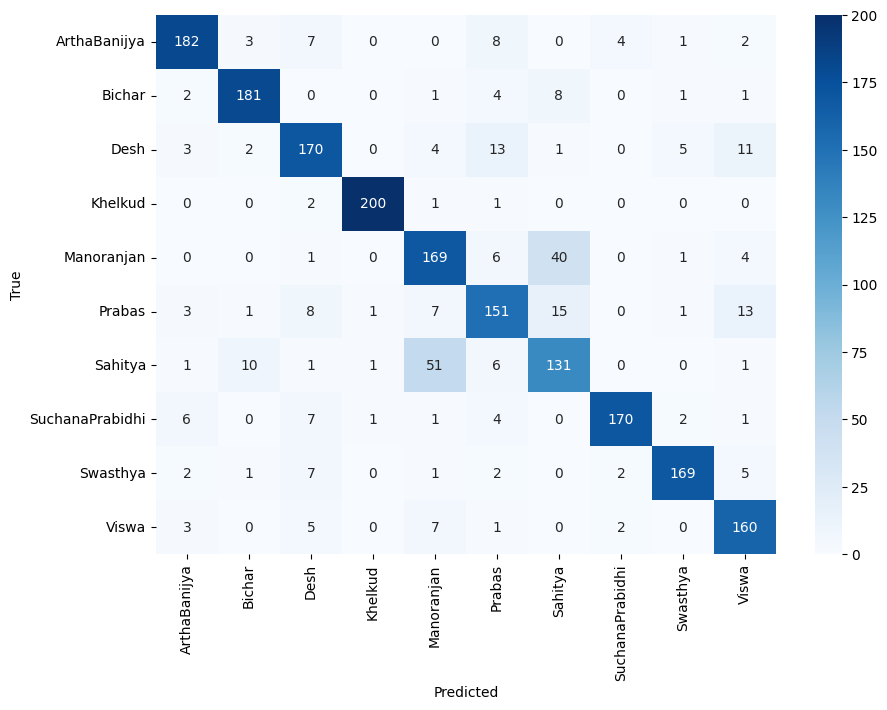

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
range_for_class = [x for x in range(0, 10, 1)]
conf_matrix = tf.math.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', yticklabels= class_name, xticklabels= class_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [19]:
class_name

array(['ArthaBanijya', 'Bichar', 'Desh', 'Khelkud', 'Manoranjan',
       'Prabas', 'Sahitya', 'SuchanaPrabidhi', 'Swasthya', 'Viswa'],
      dtype='<U15')

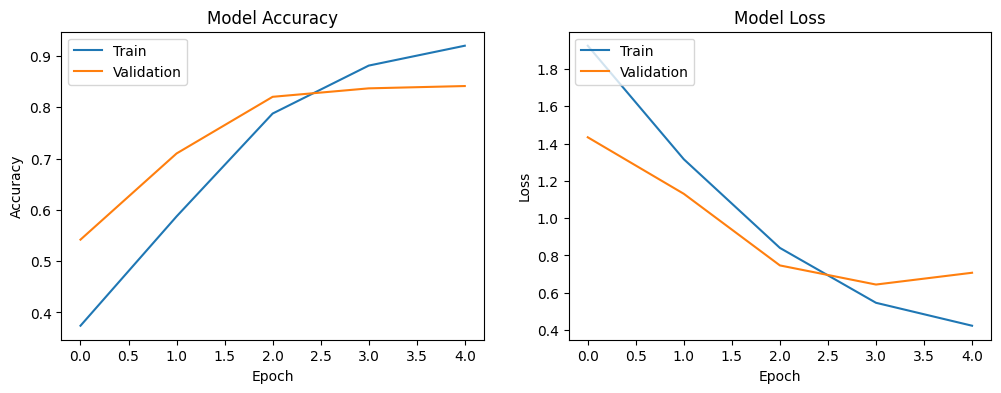

In [31]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [67]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend(model, dataset, news_index, recommendation_no = 5):
    predicted_vector = model.predict(dataset)
    main_news = np.array([predicted_vector[news_index]])
    similarity_matrix = cosine_similarity(main_news, predicted_vector)
    similarity_matrix = similarity_matrix.tolist()[0]
    result_array = []    
    for indx, similarity in enumerate(similarity_matrix):
        if indx != news_index:
            result_array.append([indx, similarity])
    result_array.sort(key=lambda x: x[1], reverse = True)
    return zip(*result_array[0: recommendation_no])

In [70]:
indexs, similarity  = recommend(model, X_test, news_index = 1, recommendation_no = 5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step


In [74]:
print(indexs, similarity)

(1114, 246, 381, 93, 223) (1.0, 0.9999999403953552, 0.9999999403953552, 0.9999998807907104, 0.9999998807907104)


In [72]:
X_test[indexs]

IndexError: too many indices for array: array is 2-dimensional, but 5 were indexed